## Business Problem

### The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

### Dataset

The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset has the following features:

Product Purchased:	KP281, KP481, or KP781

Age:	In years

Gender:	Male/Female

Education:	In years

MaritalStatus:	Single or partnered

Usage:	The average number of times the customer plans to use the treadmill each week
.
Income:	Annual income (in $)

Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.

Miles:	The average number of miles the customer expects to walk/run each week

### Product Portfolio:

The KP281 is an entry-level treadmill that sells for $1,500.

The KP481 is for mid-level runners that sell for $1,750.

The KP781 treadmill is having advanced features that sell for $2,500.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, norm, poisson, geom, expon

## 1.Defining Problem Statement and Analysing basic metrics.
  #### Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If         required), statistical summary

In [5]:
Aerofit=pd.read_csv("D:/Scaler/Python/Dataset/aerofit_treadmill.csv")
Aerofit

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [6]:
# Shape
Aerofit.shape

(180, 9)

In [7]:
# DataTypes of all Attributes
Aerofit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [8]:
Aerofit.describe()   # only taking float and integer Data type

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [9]:
Aerofit.describe(include="all")   # taking all Data types

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


## 2. Non-Graphical Analysis: Value counts and unique attributes

In [10]:
print("Number of Unique Products - ",Aerofit["Product"].nunique())
Aerofit["Product"].value_counts().to_frame()

Number of Unique Products -  3


,count
Product,
KP281,80
KP481,60
KP781,40


In [12]:
print("Number of Unique Marital Status - ",Aerofit["MaritalStatus"].nunique())
Aerofit["MaritalStatus"].value_counts().to_frame()

Number of Unique Marital Status -  2


,count
MaritalStatus,
Partnered,107
Single,73


In [13]:
Aerofit["Gender"].value_counts().to_frame()

,count
Gender,
Male,104
Female,76


In [14]:
print("Number of Unique Age - ",Aerofit["Age"].nunique())
Aerofit["Age"].value_counts().to_frame()

Number of Unique Age -  32


,count
Age,
25,25
23,18
24,12
26,12
28,9
35,8
33,8
30,7
38,7


## 3. Visual Analysis - Univariate & Bivariate

#### 3.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis

countplot- all numerical

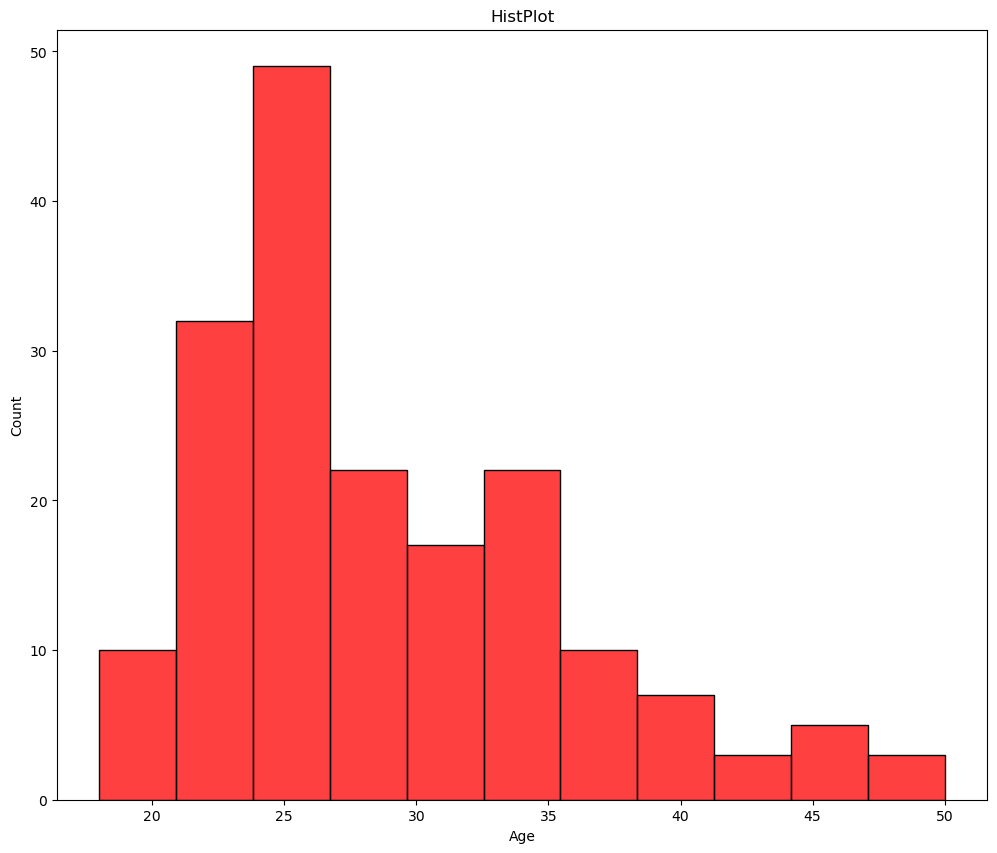

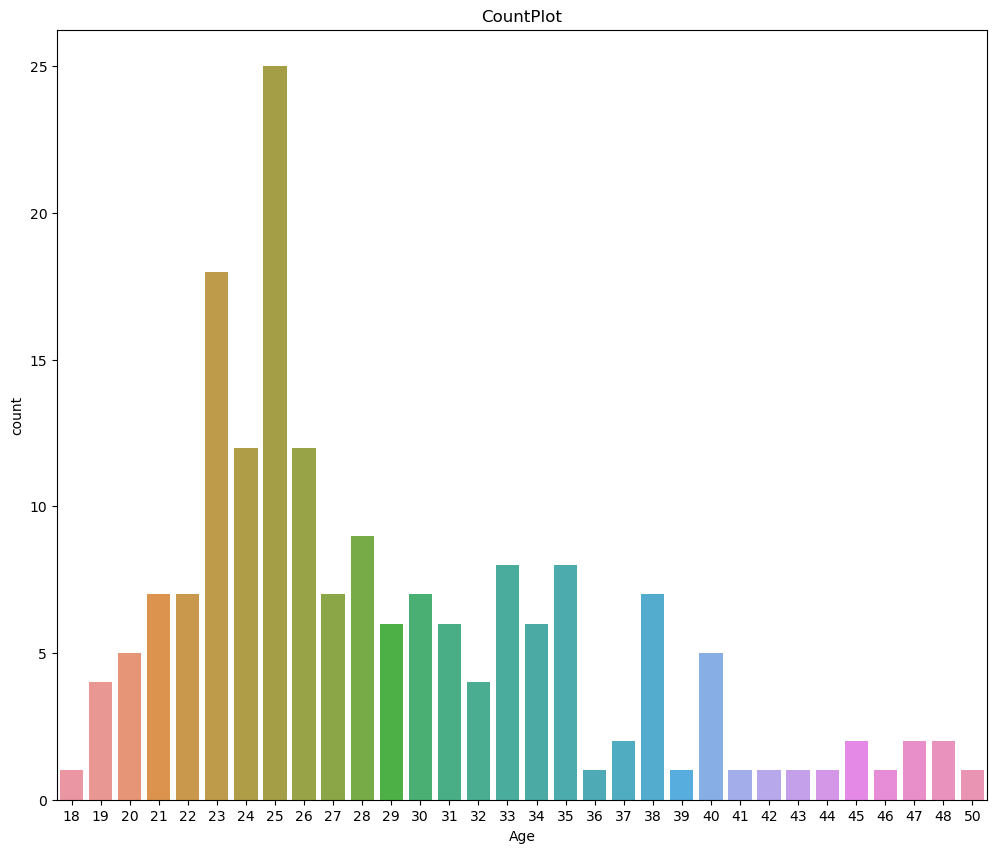

In [16]:
#Age
plt.figure(figsize=(12,10))
sns.histplot(x=Aerofit["Age"],color="red")
plt.title("HistPlot")
plt.show()

plt.figure(figsize=(12,10))
sns.countplot(x=Aerofit["Age"])
plt.title("CountPlot")
plt.show()

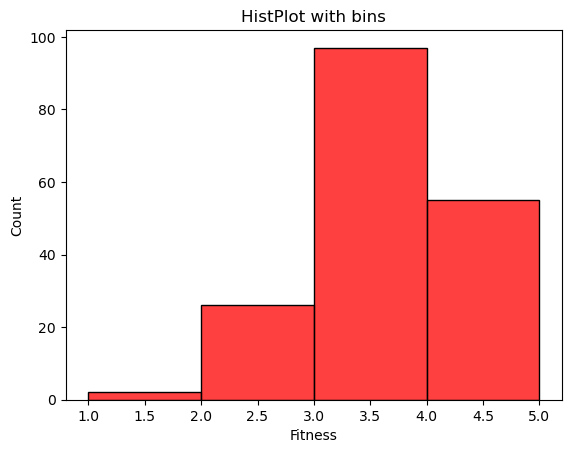

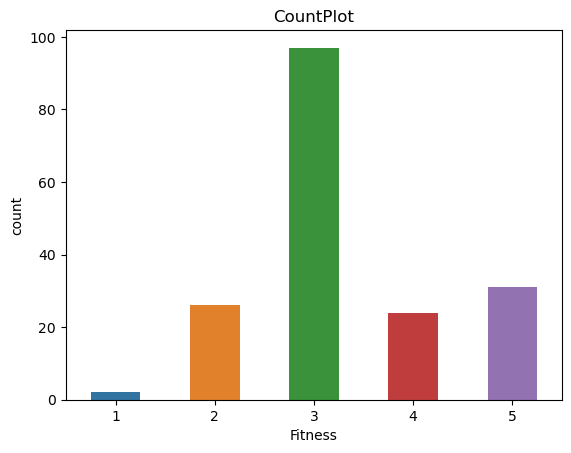

In [17]:
# Fitness

sns.histplot(x=Aerofit["Fitness"],color="red",bins=4)
plt.title("HistPlot with bins")
plt.show()

sns.countplot(x=Aerofit["Fitness"],width=0.5)
plt.title("CountPlot")
plt.show()

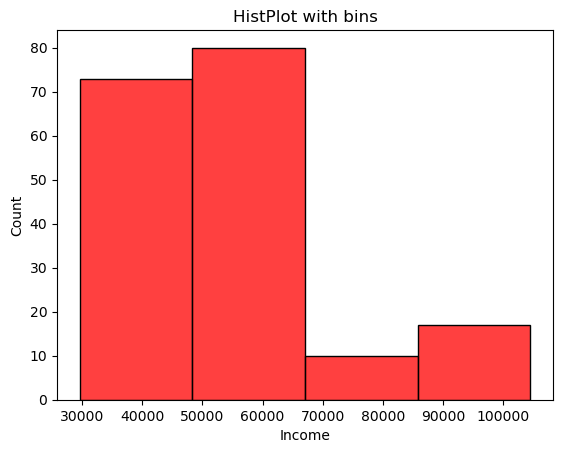

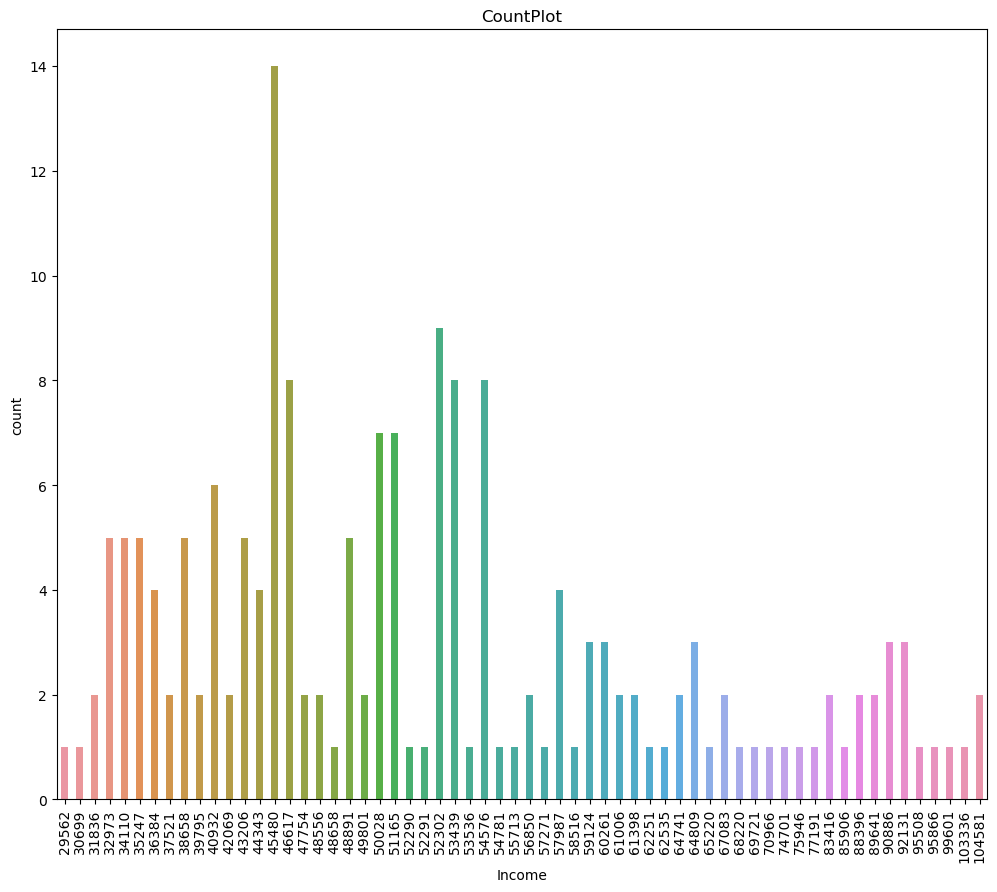

In [18]:
# Income
sns.histplot(x=Aerofit["Income"],color="red",bins=4)
plt.title("HistPlot with bins")
plt.show()

plt.figure(figsize=(12,10))
sns.countplot(x=Aerofit["Income"],width=0.5)
plt.title("CountPlot")
plt.xticks(rotation=90)
plt.show()

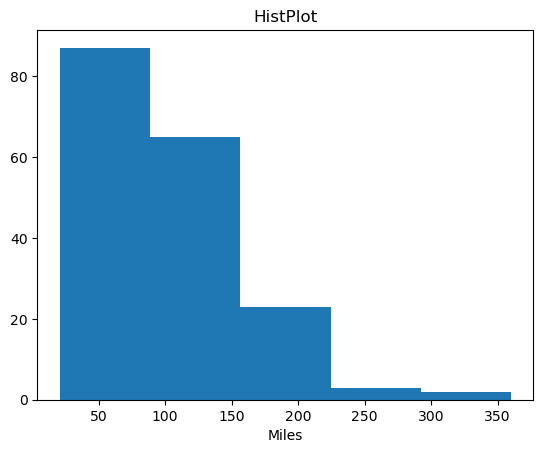

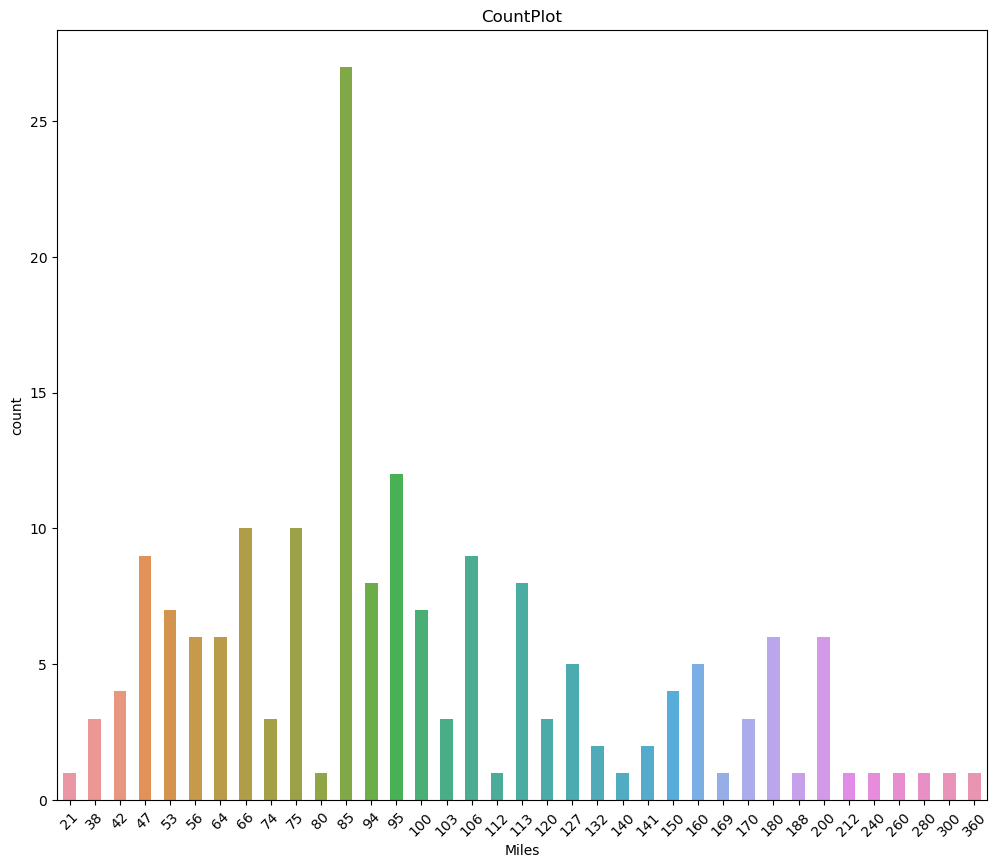

In [19]:
# Miles
# Fitness

plt.hist(x=Aerofit["Miles"],bins=5)
plt.title("HistPlot")
plt.xlabel("Miles")
plt.show()

plt.figure(figsize=(12,10))
sns.countplot(x=Aerofit["Miles"],width=0.5)
plt.title("CountPlot")
plt.xticks(rotation=45)
plt.show()

#### 3.2 For categorical variable(s): Boxplot 

In [20]:
# Modifying Data On the basis of AGE
values=[17,25,33,42,55]
Groups=['Teenagers','Mature','Adults','Oldaged']
Aerofit["Age_knowner"]=pd.cut(Aerofit["Age"],labels=Groups,bins=values)
Aerofit

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_knowner
0,KP281,18,Male,14,Single,3,4,29562,112,Teenagers
1,KP281,19,Male,15,Single,2,3,31836,75,Teenagers
2,KP281,19,Female,14,Partnered,4,3,30699,66,Teenagers
3,KP281,19,Male,12,Single,3,3,32973,85,Teenagers
4,KP281,20,Male,13,Partnered,4,2,35247,47,Teenagers
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,Adults
176,KP781,42,Male,18,Single,5,4,89641,200,Adults
177,KP781,45,Male,16,Single,5,5,90886,160,Oldaged
178,KP781,47,Male,18,Partnered,4,5,104581,120,Oldaged


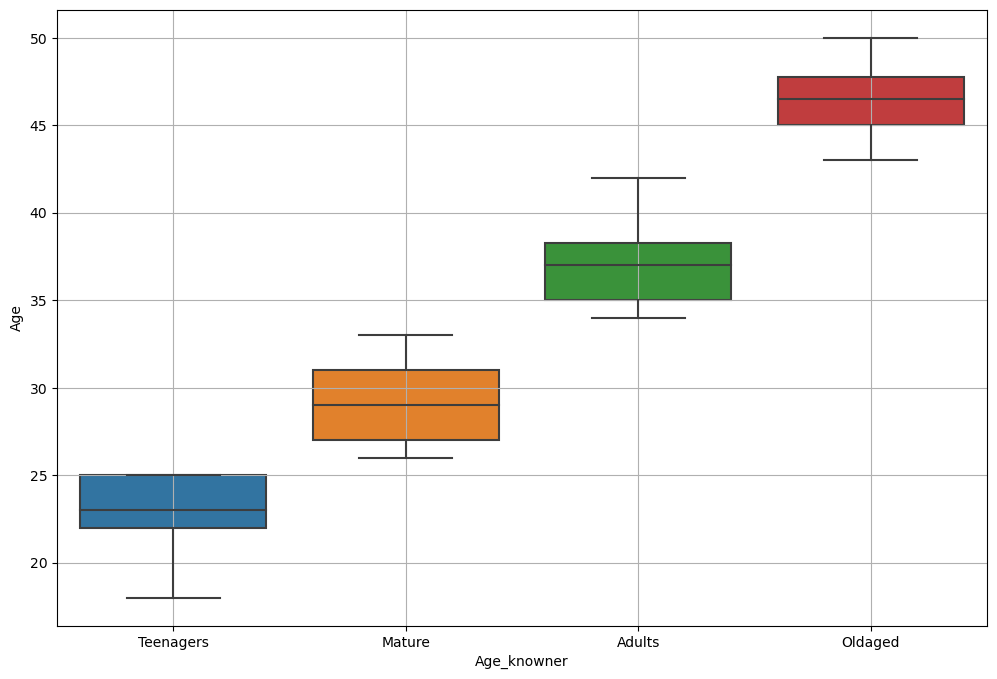

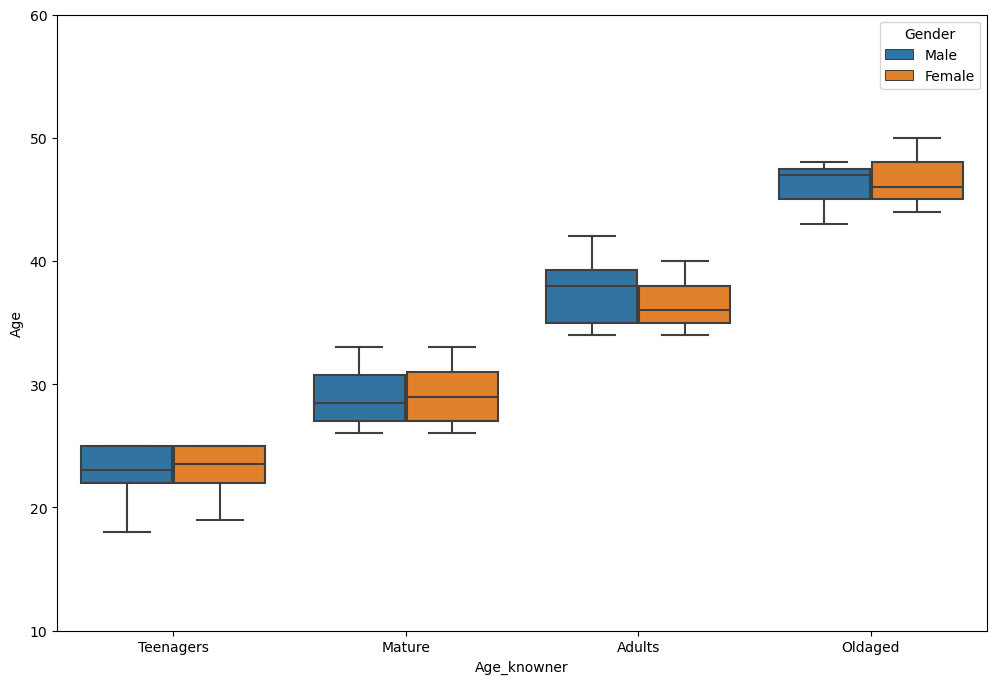

In [21]:
# BoxPlot on Age_Knowner

#Bivariate Analysis
plt.figure(figsize=(12,8))
sns.boxplot(data=Aerofit,x="Age_knowner",y="Age")
plt.grid()
plt.show()

# Tri-Variate
plt.figure(figsize=(12,8))
sns.boxplot(data=Aerofit,x="Age_knowner",y="Age",hue="Gender")
plt.ylim(bottom=10,top=60)
plt.show()

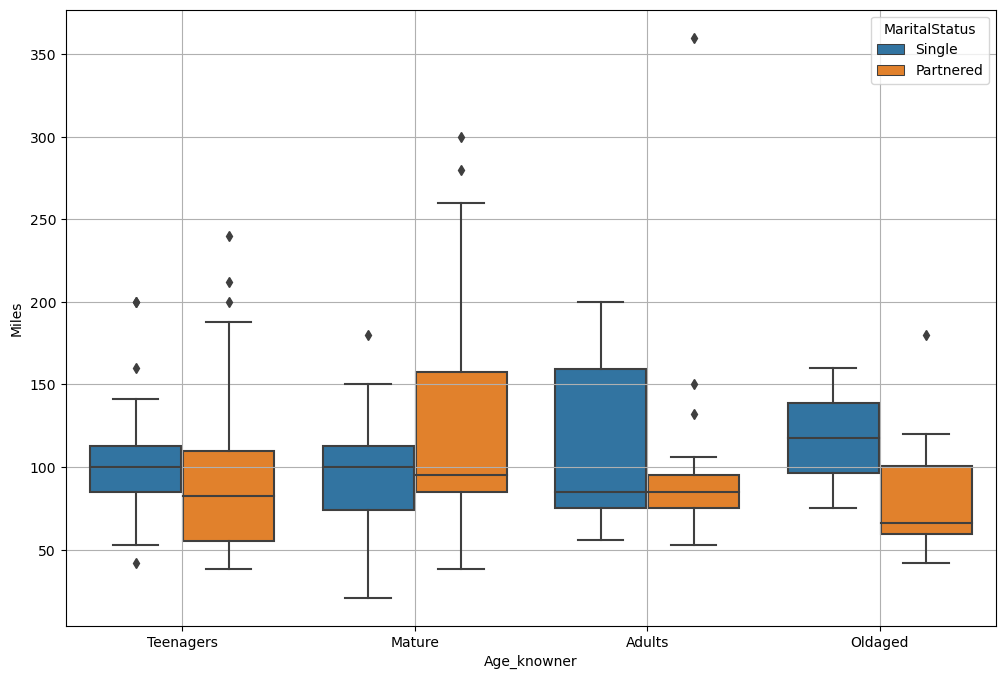

In [22]:
# Marital Status

plt.figure(figsize=(12,8))
sns.boxplot(data=Aerofit,x="Age_knowner",y="Miles",hue="MaritalStatus")
plt.grid()
plt.show()

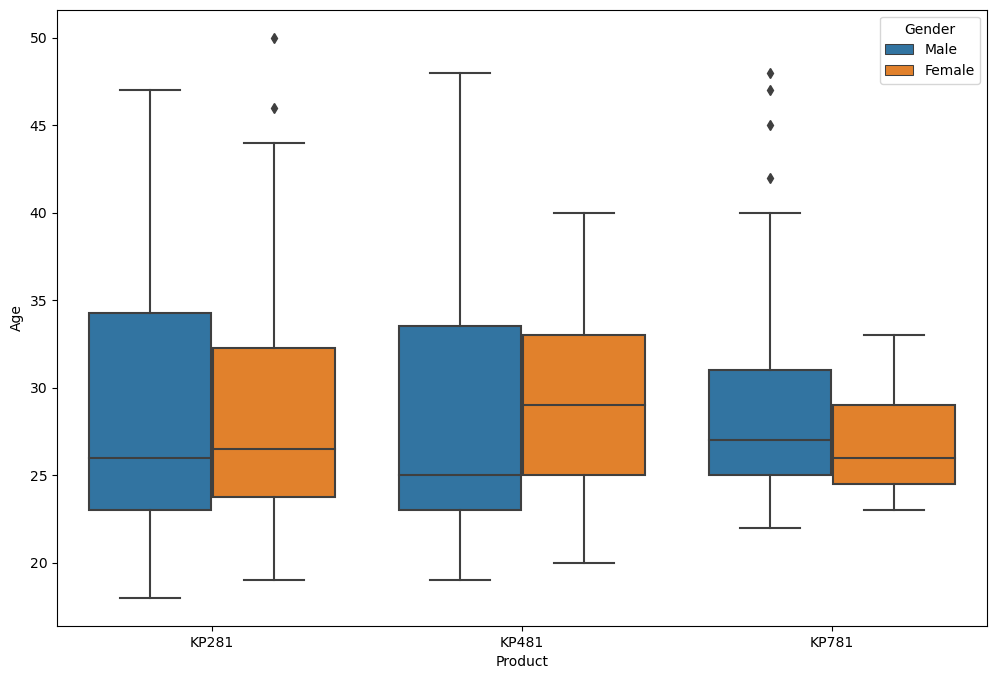

In [23]:
# Product

plt.figure(figsize=(12,8))
sns.boxplot(data=Aerofit,x="Product",y="Age",hue="Gender")
plt.show()

#### 3.3 For correlation: Heatmaps, Pairplots

C:\Users\okomk\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


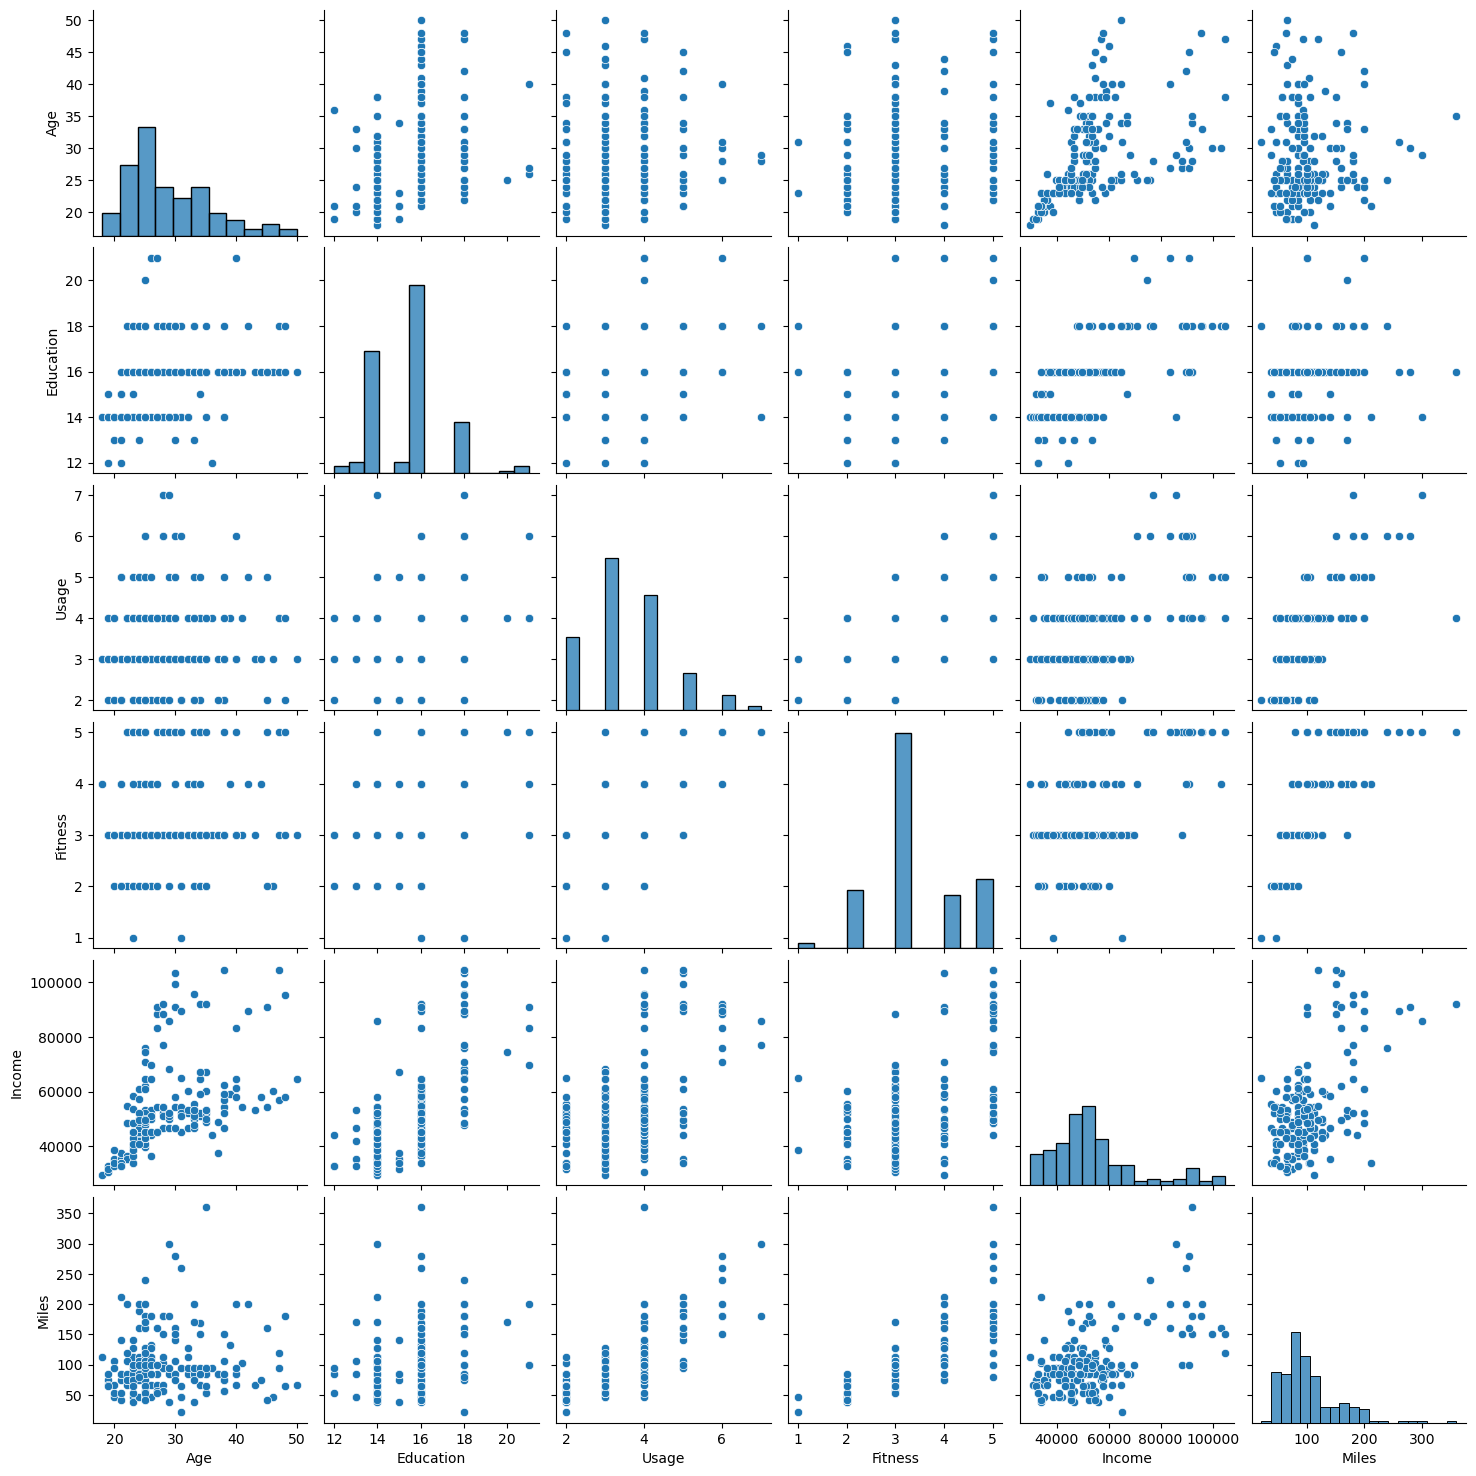

In [24]:
sns.pairplot(Aerofit)
plt.show()

In [30]:
# Top 5 Data

Top_5_Age=Aerofit["Age"].value_counts().index[:5]
Top_5_Income=Aerofit["Income"].value_counts().index[:5]
Top_5_Miles=Aerofit["Miles"].value_counts().index[:5]

Top_5_data_based_on_Age_Income_Miles=Aerofit[(Aerofit["Age"].isin(Top_5_Age)) & (Aerofit["Income"].isin(Top_5_Income)) & (Aerofit["Miles"].isin(Top_5_Miles))]
Top_5_data_based_on_Age_Income_Miles

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_knowner
26,KP281,24,Female,16,Single,4,3,46617,75,Teenagers
29,KP281,25,Female,14,Partnered,2,2,53439,47,Teenagers
36,KP281,26,Male,16,Partnered,2,2,53439,47,Mature
45,KP281,28,Female,16,Partnered,2,3,52302,66,Mature
89,KP481,23,Female,16,Single,3,3,45480,95,Teenagers
97,KP481,25,Female,14,Partnered,2,3,45480,85,Teenagers
101,KP481,25,Male,14,Single,3,3,45480,95,Teenagers
108,KP481,26,Female,16,Partnered,4,3,45480,85,Mature


C:\Users\okomk\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


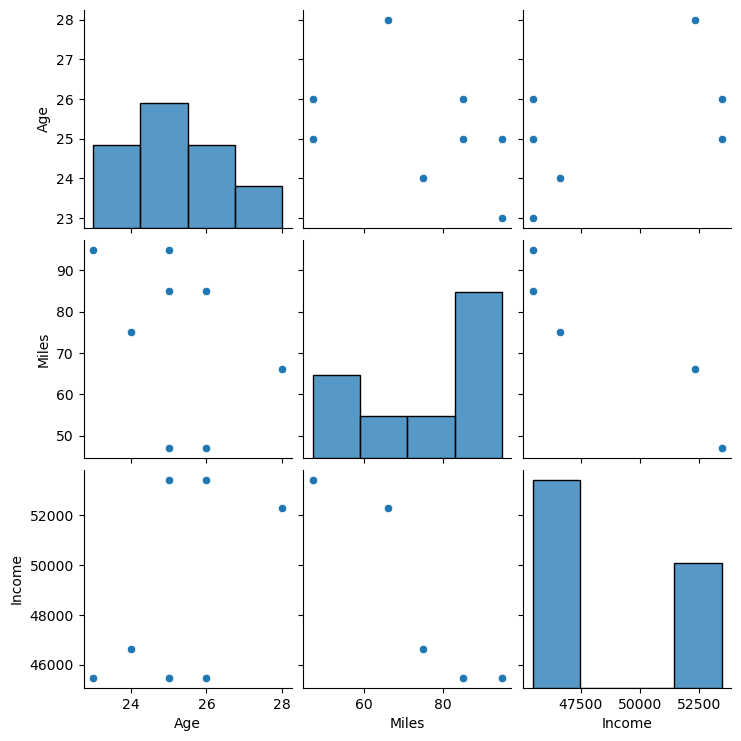

In [31]:
sns.pairplot(data=Top_5_data_based_on_Age_Income_Miles[["Age","Miles","Income","Product"]])
plt.show()

C:\Users\okomk\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


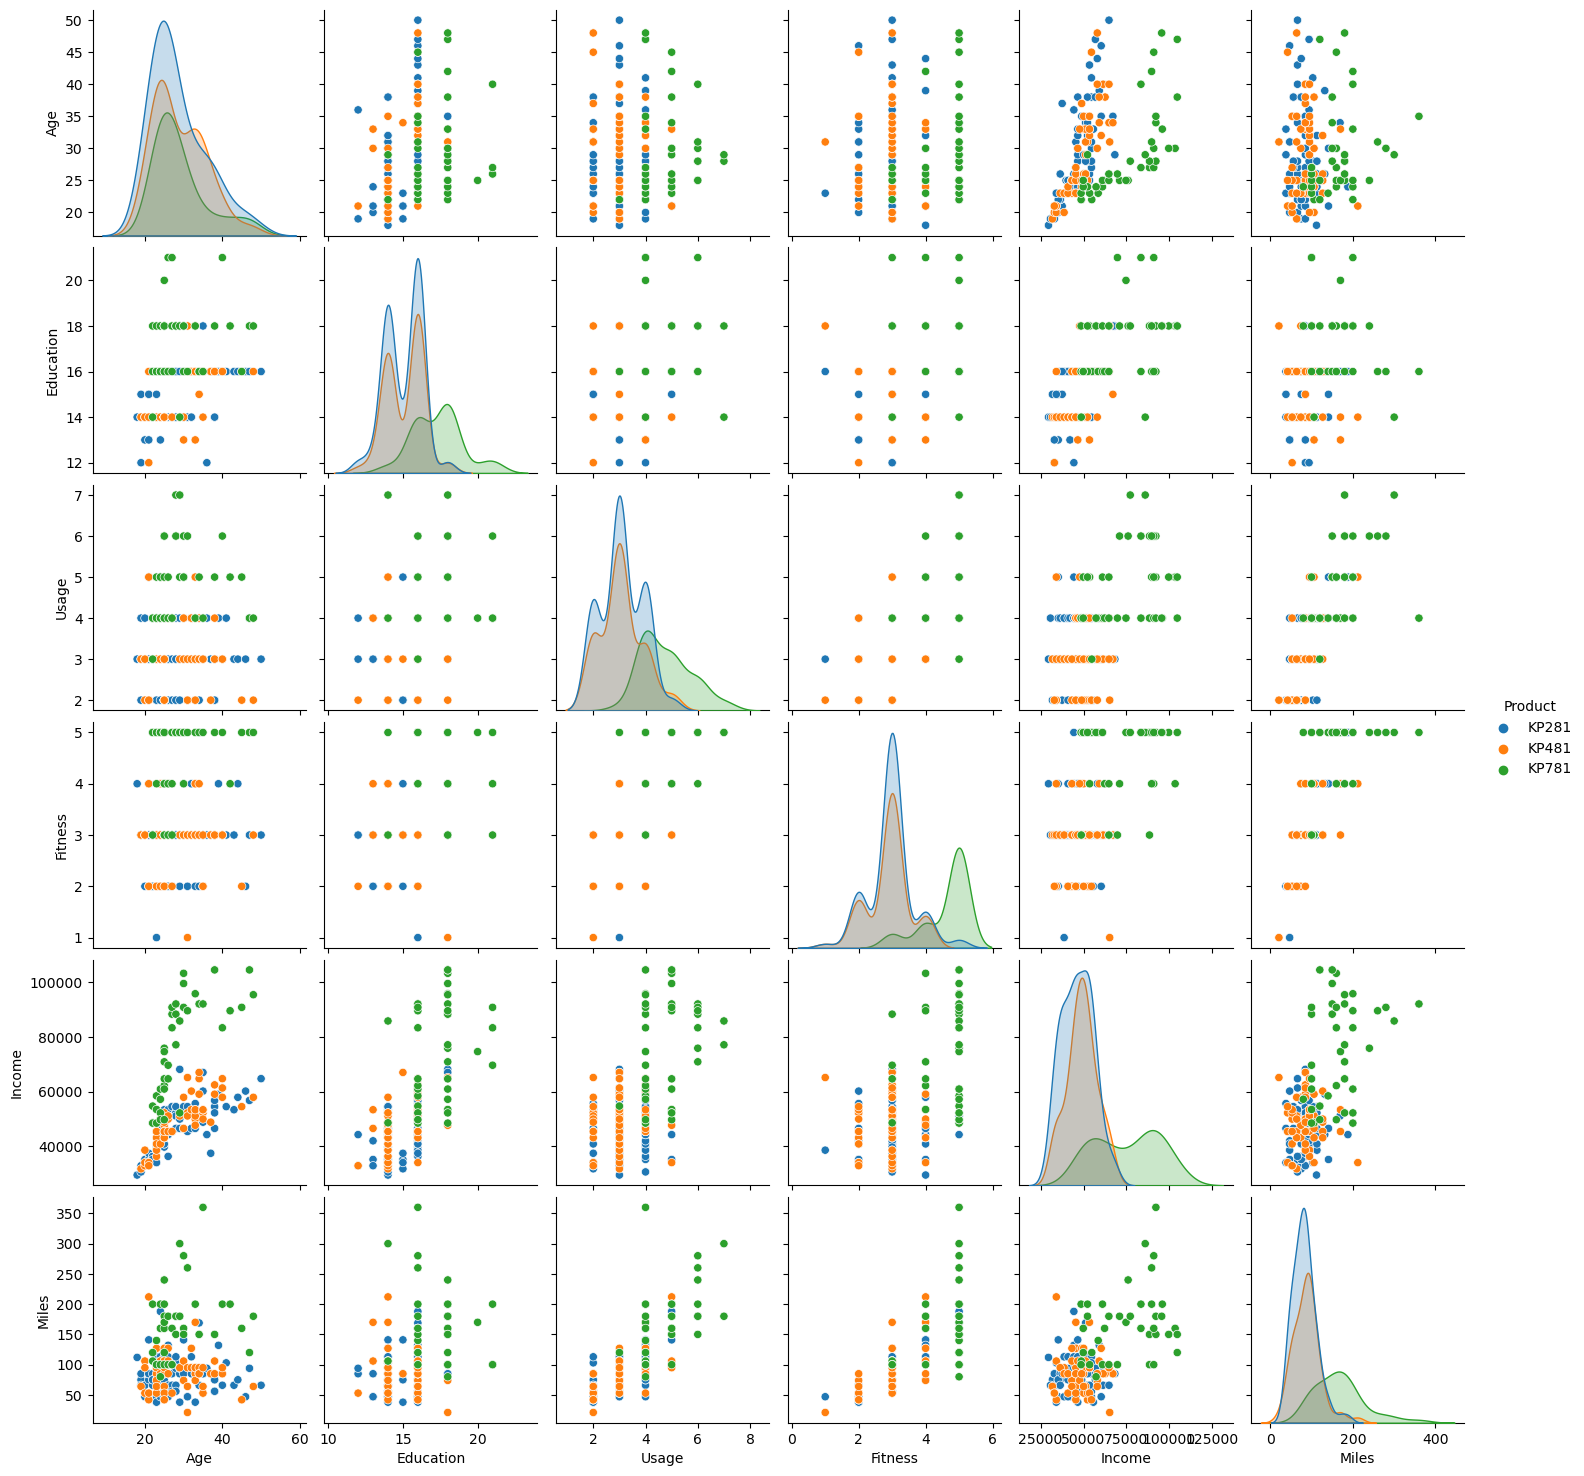

In [32]:
sns.pairplot(data=Aerofit,hue="Product")
plt.show()


C:\Users\okomk\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


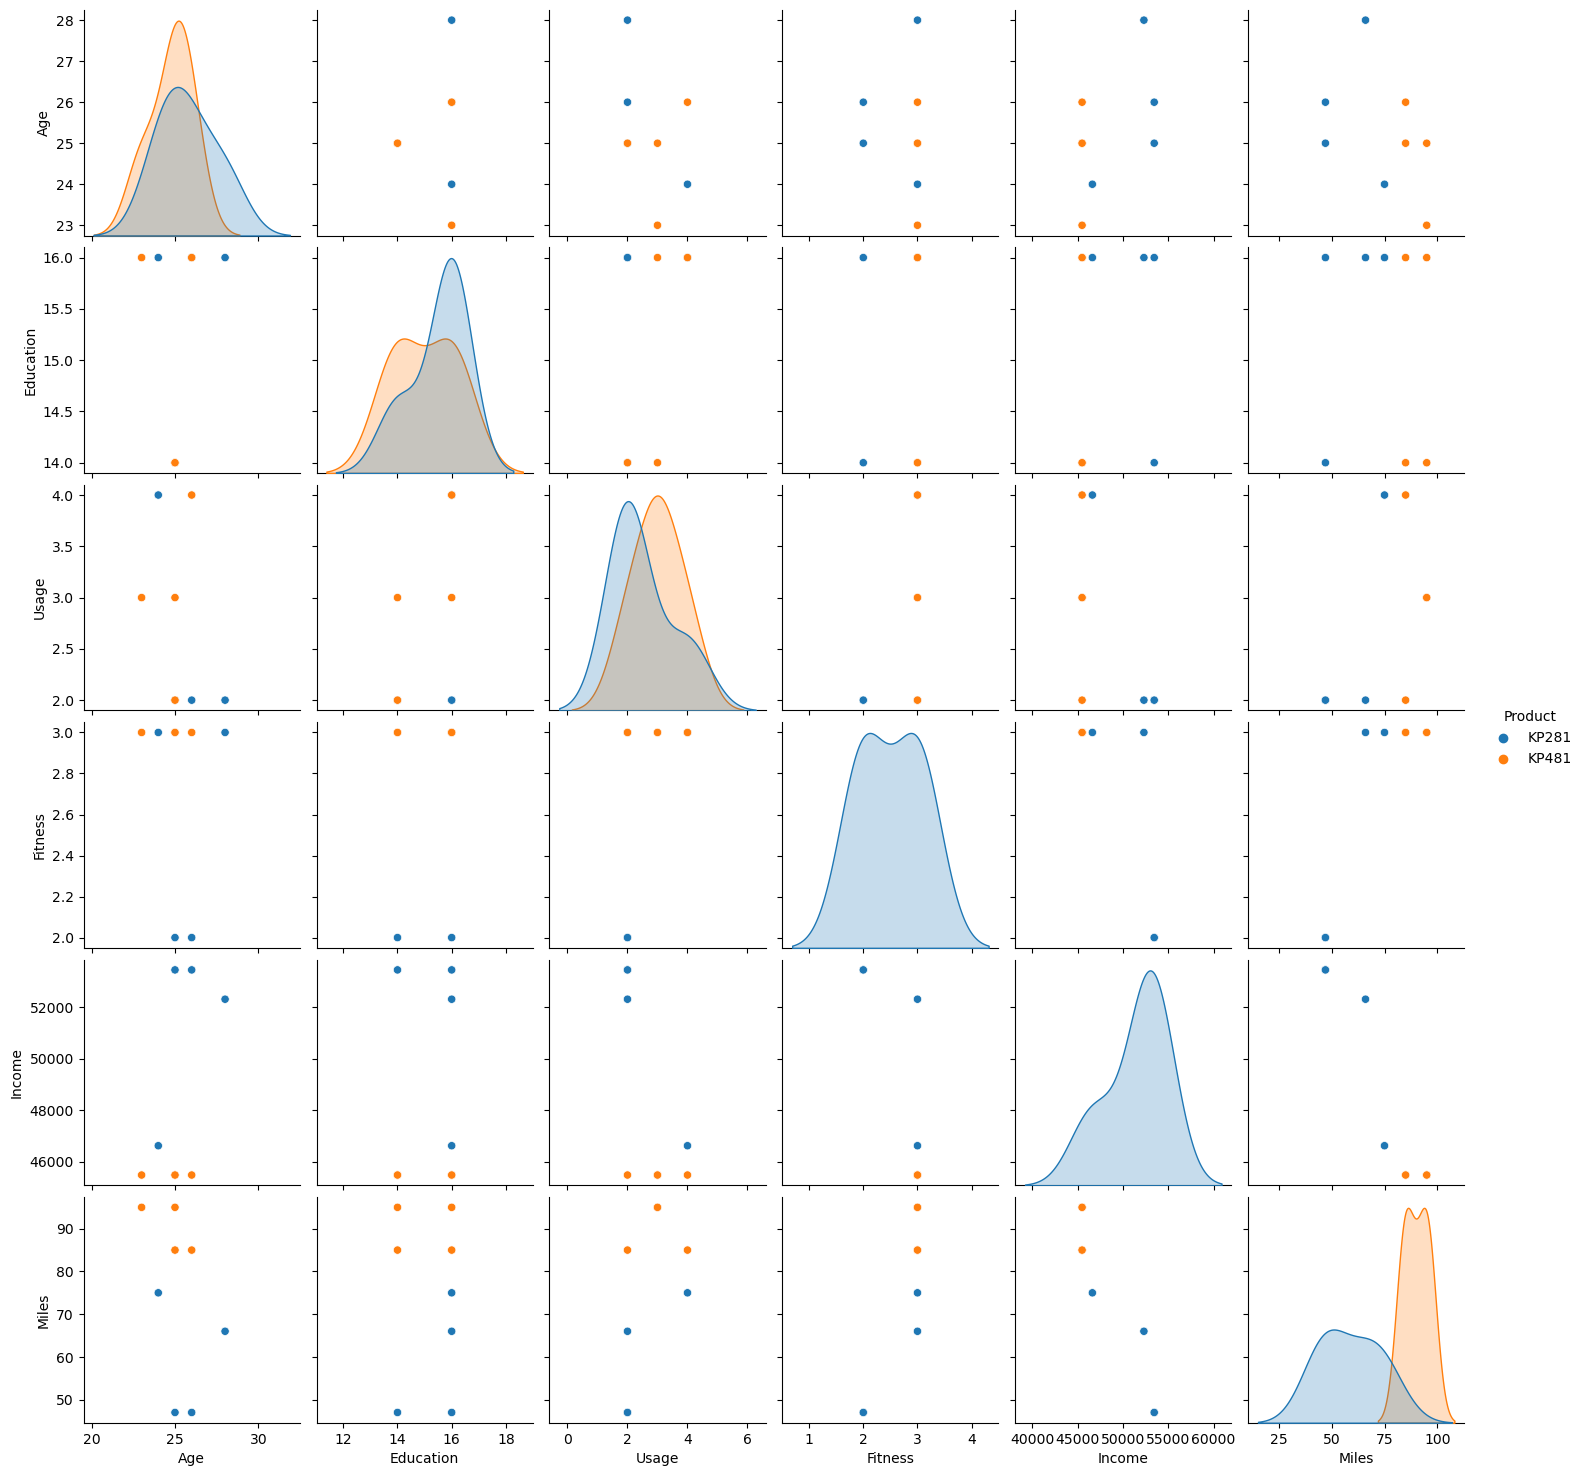

In [33]:
sns.pairplot(data=Top_5_data_based_on_Age_Income_Miles,hue="Product")
plt.show()

## 4. Missing Value & Outlier Detection

People of Age less than  10.5  and people of age greater than  46.5 are outlier


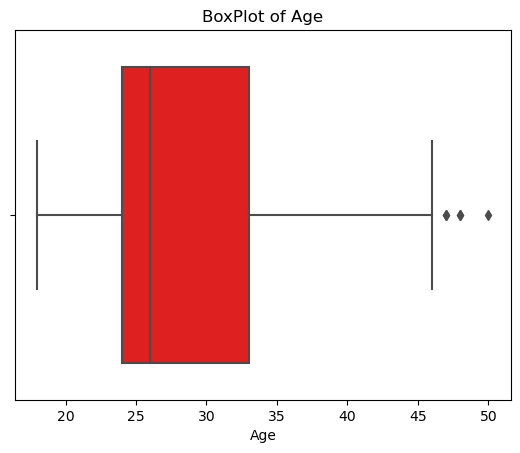

In [34]:
# Age - BoxPlot
Age_25=np.percentile(Aerofit["Age"],25)
Age_75=np.percentile(Aerofit["Age"],75)
IQR=Age_75-Age_25
Lower=max(Age_25-(1.5*IQR),0)
Upper=Age_75+(1.5*IQR)

print("People of Age less than ",Lower," and people of age greater than ",Upper,"are outlier")

sns.boxplot(x=Aerofit["Age"],color="red")
plt.title("BoxPlot of Age")
plt.show()

People of Education less than  11.0  and people of Education greater than  19.0 are outlier


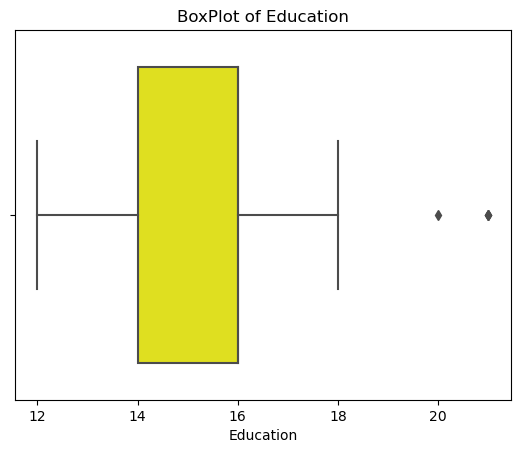

In [35]:
# Education

Education_25=np.percentile(Aerofit["Education"],25)
Education_75=np.percentile(Aerofit["Education"],75)
IQR=Education_75-Education_25
Lower=max(Education_25-(1.5*IQR),0)
Upper=Education_75+(1.5*IQR)

print("People of Education less than ",Lower," and people of Education greater than ",Upper,"are outlier")

sns.boxplot(x=Aerofit["Education"],color="yellow")
plt.title("BoxPlot of Education")
plt.show()

In [36]:
# to delete rows having missing values
Aerofit.dropna()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_knowner
0,KP281,18,Male,14,Single,3,4,29562,112,Teenagers
1,KP281,19,Male,15,Single,2,3,31836,75,Teenagers
2,KP281,19,Female,14,Partnered,4,3,30699,66,Teenagers
3,KP281,19,Male,12,Single,3,3,32973,85,Teenagers
4,KP281,20,Male,13,Partnered,4,2,35247,47,Teenagers
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,Adults
176,KP781,42,Male,18,Single,5,4,89641,200,Adults
177,KP781,45,Male,16,Single,5,5,90886,160,Oldaged
178,KP781,47,Male,18,Partnered,4,5,104581,120,Oldaged


### the above dropna shows there are no missing values in complete data as shape of original data and after drop is same

## 5. Business Insights based on Non-Graphical and Visual Analysis

#### 5.1 Comments on the range of attributes

In [39]:
Aerofit.describe()


,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [51]:
# Age
a1=Aerofit["Age"].unique()
a2=Aerofit["Age"].nunique()
print("Unique Value of Age : ")
print(a1)
print("**************************")
print("Total Unique Age : ")
print(a2)
print("**************************")
print("From Aerofit.describe()")
print("minimum age : 18")
print("maximum age : 50")


Unique Value of Age : 
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]
**************************
Total Unique Age : 
32
**************************
From Aerofit.describe()
minimum age : 18
maximum age : 50


In [52]:
# Education
a1=Aerofit["Education"].unique()
a2=Aerofit["Education"].nunique()
print("Unique Value of Education : ")
print(a1)
print("**************************")
print("Total Unique Education : ")
print(a2)
print("**************************")
print("From Aerofit.describe()")
print("minimum Education : 12")
print("maximum Education : 21")

Unique Value of Education : 
[14 15 12 13 16 18 20 21]
**************************
Total Unique Education : 
8
**************************
From Aerofit.describe()
minimum Education : 12
maximum Education : 21


In [53]:
# Income
a1=Aerofit["Income"].unique()
a2=Aerofit["Income"].nunique()
print("Unique Value of Income : ")
print(a1)
print("**************************")
print("Total Unique Income : ")
print(a2)
print("**************************")
print("From Aerofit.describe()")
print("minimum Income : 29562")
print("maximum Income : 104581")

Unique Value of Income : 
[ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  90886  92131  77191  52290  85906 103336  99601  89641  95866
 104581  95508]
**************************
Total Unique Income : 
62
**************************
From Aerofit.describe()
minimum Income : 29562
maximum Income : 104581


#### 5.2 Comments on the distribution of the variables and relationship between them

#### 5.3 Comments for each univariate and bivariate plot

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64


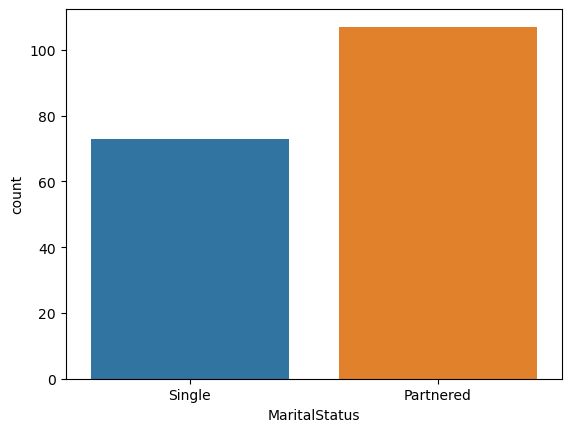

We Observed that Partnered status People mostly purchased a treadmill from the AeroFit stores during the prior three months
Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64


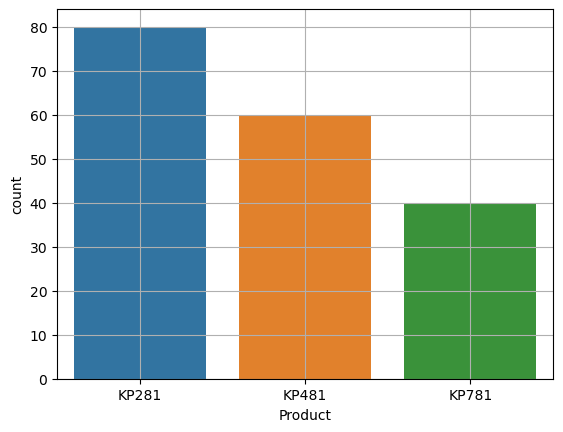

Product KP281 is highly purchase treadmil by peoples
Gender
Male      104
Female     76
Name: count, dtype: int64


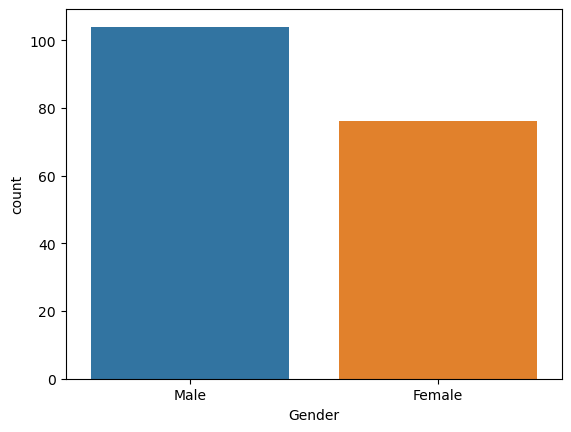

Males Gender is more consious to their healths


In [54]:
# Martial Status
x1=Aerofit["MaritalStatus"].value_counts()
print(x1)
sns.countplot(x=Aerofit["MaritalStatus"])
plt.show()
print("We Observed that Partnered status People mostly purchased a treadmill from the AeroFit stores during the prior three months")

# Product
x2=Aerofit["Product"].value_counts()
print(x2)
sns.countplot(x=Aerofit["Product"])
plt.grid()
plt.show()
print("Product KP281 is highly purchase treadmil by peoples")

# Gender
x3=Aerofit["Gender"].value_counts()
print(x3)
sns.countplot(x=Aerofit["Gender"])
plt.show()
print("Males Gender is more consious to their healths")



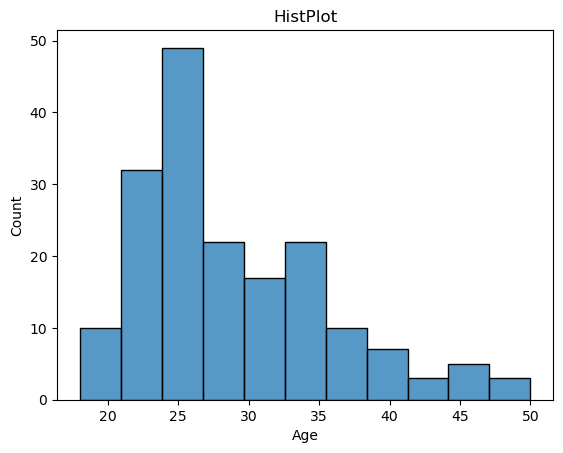

We notice that age group of 25 people are more use of aerofit product


In [55]:
# GRAPHICAL ANALYSIS

sns.histplot(x=Aerofit["Age"])
plt.title("HistPlot")
plt.show()
print("We notice that age group of 25 people are more use of aerofit product")

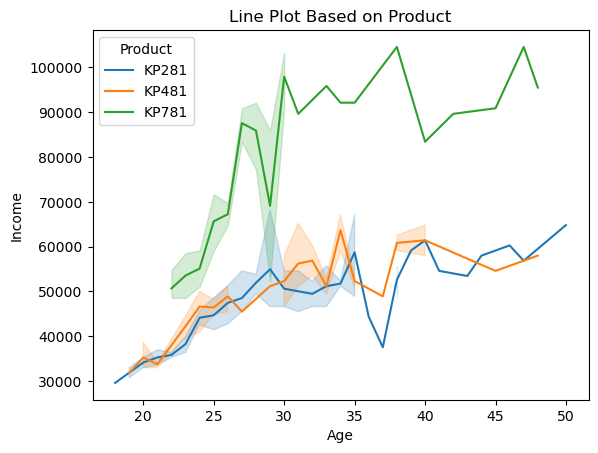

KP781 product is mostly used by all age groups and it is also noticable that High income people use this mostly this product and it is also notiocable that KP281 is highly Purchase but people with low income purchase this mostly


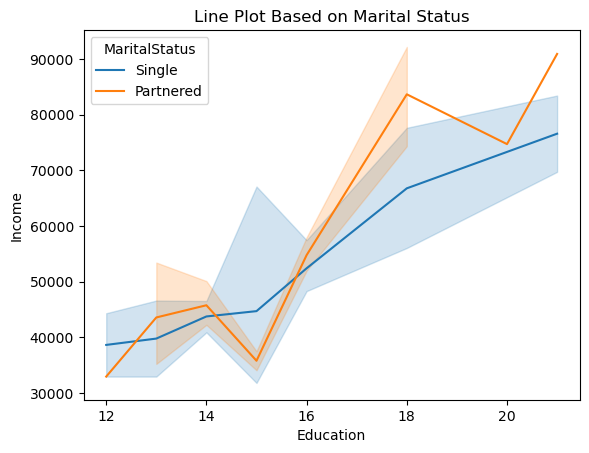

Partnered people and single people both are educated but incomes of partnered peoples are more


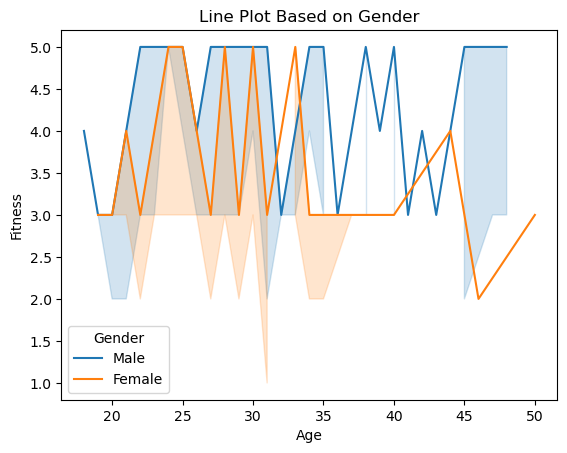

Male gender is constantly more consious to their health whereas females are too but they are not constant, they  are fluctating over age 
---------------------------------------------------------------
Probability of use KP281 -  0.4444444444444444
Probability of use KP481 -  0.3333333333333333
Probability of use KP781 -  0.2222222222222222


In [56]:
# Product

# GRAPHICAL ANALYSIS
sns.lineplot(data=Aerofit,x="Age",y="Income",hue="Product")
plt.title("Line Plot Based on Product")
plt.show()
print("KP781 product is mostly used by all age groups and it is also noticable that High income people use this mostly this product and it is also notiocable that KP281 is highly Purchase but people with low income purchase this mostly")

sns.lineplot(data=Aerofit,x="Education",y="Income",hue="MaritalStatus")
plt.title("Line Plot Based on Marital Status")
plt.show()
print("Partnered people and single people both are educated but incomes of partnered peoples are more")

sns.lineplot(data=Aerofit,x="Age",y="Fitness",hue="Gender",estimator=np.max)
plt.title("Line Plot Based on Gender")
plt.show()
print("Male gender is constantly more consious to their health whereas females are too but they are not constant, they  are fluctating over age ")
print("---------------------------------------------------------------")


# Non-Graphical Analysis
total_len=Aerofit.shape[0]
len_KP281=Aerofit[Aerofit["Product"]=='KP281'].shape[0]
len_KP481=Aerofit[Aerofit["Product"]=='KP481'].shape[0]
len_KP781=Aerofit[Aerofit["Product"]=='KP781'].shape[0]

Prob_KP281=len_KP281/total_len
Prob_KP481=len_KP481/total_len
Prob_KP781=len_KP781/total_len

print("Probability of use KP281 - ",Prob_KP281)
print("Probability of use KP481 - ",Prob_KP481)
print("Probability of use KP781 - ",Prob_KP781)


In [57]:
# Non-Graphical Analysis

Top_3_Age=Aerofit["Age"].value_counts().index[:3]
Top_3_Income=Aerofit["Income"].value_counts().index[:3]
Top_3_Miles=Aerofit["Miles"].value_counts().index[:3]

print("Top_3_Age_People more use Aerofit Product : ",Top_3_Age)
print("Top_3_Income_People : ",Top_3_Income)
print("Top_3_Miles_runned by People on Treadmil : ",Top_3_Miles)

Top_3_Age_People more use Aerofit Product :  Index([25, 23, 24], dtype='int64', name='Age')
Top_3_Income_People :  Index([45480, 52302, 46617], dtype='int64', name='Income')
Top_3_Miles_runned by People on Treadmil :  Index([85, 95, 66], dtype='int64', name='Miles')


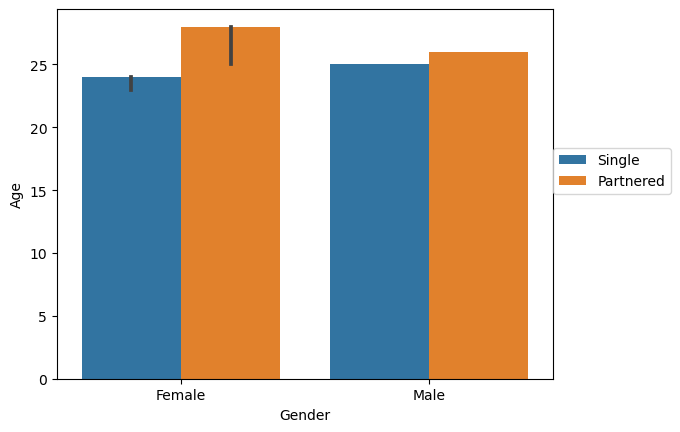

Total Genders in top 5 : 
Gender
Female    6
Male      2
Name: count, dtype: int64
*******************************************
Marital Status in top 5 : 
MaritalStatus
Partnered    5
Single       3
Name: count, dtype: int64


In [58]:
# Graphical analysis on top data
sns.barplot(data=Top_5_data_based_on_Age_Income_Miles,x="Gender",y="Age",hue="MaritalStatus",estimator=np.max)
plt.legend(loc=(1,0.5))
plt.show()

y1=Top_5_data_based_on_Age_Income_Miles["Gender"].value_counts()
y2=Top_5_data_based_on_Age_Income_Miles["MaritalStatus"].value_counts()

print("Total Genders in top 5 : ")
print(y1)
print("*******************************************")
print("Marital Status in top 5 : ")
print(y2)

## 6. Recommendations - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand

Products

The KP281 is an entry-level treadmill that sells for $1,500.

The KP481 is for mid-level runners that sell for $1,750.

The KP781 treadmill is having advanced features that sell for $2,500.

​

1.As we see People muchy more buys KP281 which is having least cost in all three products , but company should decrease cost of KP781 Product as we have seen people having high incomes are more likely interested in buying it and people of low income more focus on KP281,KP481.

2.Company should more focus on Single marital status and female gender peoples as we have seen both of these category people are less aware of aerofit products.

3.Company should promote more awareness of health and their equipments in people of age group betwwen 35-50 years people.

4.Company should make females more attractive about gyming and physical health as we see females are attentive toward aerofit product but they are not consistent.

5.Peoples running more than 200 miles are very few , so company should promote peoples more awareness toward running and should offer them discount coupons if they run more than 200 miles.

6.Peoles of income between 30K-67K are more using Aerofit Equipments , So Company should have some few high range Products with more facility to high incomes peoples i.e. income>67K.

7.Mostly people are targeted toward 3 Fitness band , Company should every month held prize distribution to people have only 5 fitness band so that more people will exercise and due to it people will start promoting Aerofit Products.

8.As worked on this Aerofit Data , Viewed one common thing that Every People who use product have given values to evey columns rather than missing it which is good for company.